In [1]:
%matplotlib notebook

In [225]:
import numpy as np
import pandas as pd
from bnspopkne.kne import Setzer2022_kilonova as saeev
from bnspopkne.kne import Setzer2022_population_parameter_distribution as s22p

In [253]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import matplotlib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.95)
circular = sns.color_palette("colorblind", 10)
sns.set_palette(circular)
sequential = sns.cubehelix_palette(10, start=0.5, rot=-0.75)
diverging = sns.color_palette("RdBu", 10)
greys = sns.color_palette("Greys")
grey_cmap = ListedColormap(greys)
seq_mpl = ListedColormap(sequential)
plt.rc("text", usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times']})
cmap2 = sns.cm.rocket_r
cmap1 = sns.cm.rocket

In [3]:
test_inst = saeev(
    mass1=1.5,
    mass2=1.5,
)

In [4]:
# List out the parameters of the BNS mergers kilonova and binary inspiral
for i in range(12):
    print(f"{getattr(test_inst, f'param{i+1}_name')}: {getattr(test_inst, f'param{i+1}')}")

mass1: 1.5
mass2: 1.5
compactness1: 0.18709909513866615
compactness2: 0.18709909513866615
viewing_angle: 1.1765428215773828
electron_fraction: 0.19496917522308127
dynamical_ejecta_mass: 0.0031141174707924844
median_ejecta_velocity: 0.25626358545511224
grey_opacity: 20.243380789328757
secular_ejecta_mass: 0.046533944407834336
total_ejecta_mass: 0.04964806187862682
disk_unbinding_efficiency: 0.29311613338515397


Note in current setup creating the population takes quite long, but it works.

In [5]:
test_dist = s22p()

100%|██████████████████████████████████████████| 50000/50000 [01:01<00:00, 813.57it/s]


In [11]:
import numpy as np
x = np.load('traning_data_array.npy')

<IPython.core.display.Javascript object>


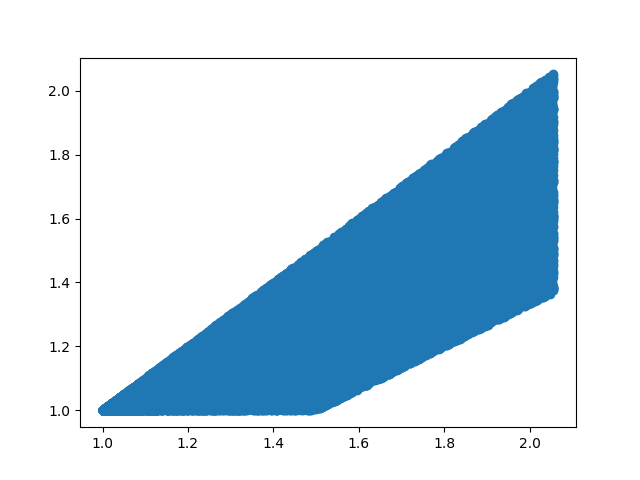

In [220]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_dist.param1, test_dist.param2)
ax.xlabel('M')

fig = plt.figure()
ax = plt.axes()
ax.scatter(test_dist.param11, test_dist.param8)

<IPython.core.display.Javascript object>


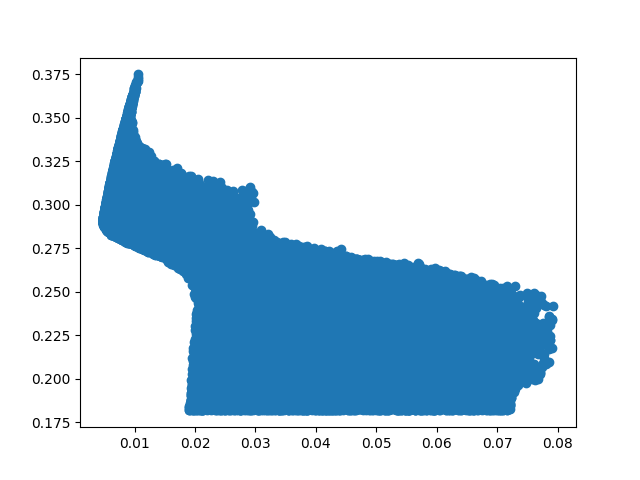

In [219]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_dist.param11, test_dist.param8)

In [202]:
new_Ye = np.array([0.15, 0.175,0.2,0.225,0.25,0.3,0.35,0.4])
new_mej = np.array([0.002, 0.01, 0.02, 0.03, 0.05, 0.065, 0.08])
new_vej = np.array([0.2, 0.25, 0.3, 0.35, 0.4])
m,v,y = np.meshgrid(new_mej, new_vej, new_Ye)
mf = m.flatten()
vf = v.flatten()
yf = y.flatten()

newx = np.empty((len(yf),3))
newx[:, 0] = mf
newx[:, 1] = vf
newx[:, 2] = yf

print(len(yf))

280


<IPython.core.display.Javascript object>


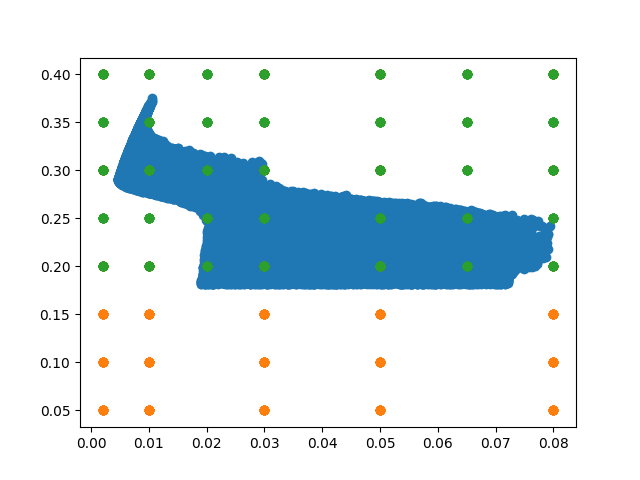

In [203]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_dist.param11, test_dist.param8)
ax.scatter(x[:, 0], x[:, 1]);
ax.scatter(mf, vf)

In [204]:
bool_list = []
for i in range(newx.shape[0]):
    if newx[i, 0] > 0.05 and newx[i,1] > 0.275:
        bool_list.append(False)
    elif newx[i, 0] > 0.03 and newx[i,1] > 0.3:
        bool_list.append(False)
    elif newx[i, 0] > 0.015 and newx[i,1] > 0.325:
        bool_list.append(False)
    elif newx[i, 0] < 0.015 and newx[i, 1] < 0.25:
        bool_list.append(False)
    elif newx[i, 0] < 0.02 and newx[i, 1] < 0.175:
        bool_list.append(False)
    elif newx[i, 0] < 0.01 and newx[i, 1] < 0.275:
        bool_list.append(False)
    elif newx[i, 0] < 0.006 and newx[i, 1] > 0.3:
        bool_list.append(False)
    elif newx[i,0] in x[:,0] and newx[i,1] in x[:,1] and newx[i,2] in x[:,2]:
        bool_list.append(False)
    else:
        bool_list.append(True)
newnewx = newx[bool_list]

<IPython.core.display.Javascript object>


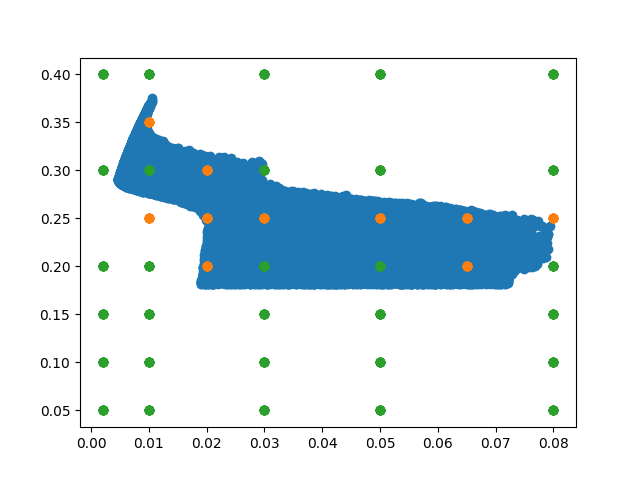

In [221]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_dist.param11, test_dist.param8)
ax.scatter(newnewx[:,0], newnewx[:,1])
ax.scatter(x[:, 0], x[:, 1])

In [207]:
np.save('minimal_training_data_request_for_Oleg.npy',newnewx)

In [209]:
new_training_df = pd.DataFrame({'Ejecta Mass [M_sol]': newnewx[:,0], 'Ejecta Velocity [c]': newnewx[:,1], 'Electron Fraction':newnewx[:,2]})

In [211]:
new_training_df.to_csv('minimal_training_data.csv', index=False)

In [215]:
ints = np.random.randint(low=0, high=49999, size=14)
validation_x = np.empty((len(ints),3))
validation_x[:,0] = np.array([0.0055, 0.0175, 0.013, 0.008, 0.026, 0.023, 0.045, 0.033, 0.055, 0.0675, 0.058, 0.045, 0.075, 0.065])
validation_x[:,1] = np.array([0.29, 0.285, 0.315, 0.34, 0.27, 0.19, 0.24, 0.235, 0.26, 0.24, 0.21, 0.1875, 0.22, 0.19])
validation_x[:,2] = test_dist.param6[ints]

<IPython.core.display.Javascript object>


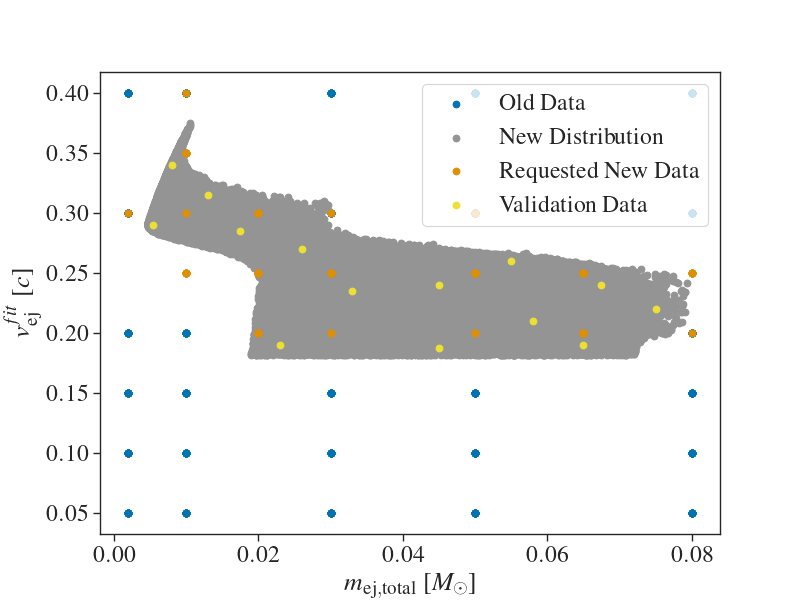

In [263]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.scatter(x[:, 0], x[:, 1], label='Old Data')
ax.scatter(test_dist.param11, test_dist.param8, label='New Distribution', rasterized=True, color=circular[7])
ax.scatter(newnewx[:,0], newnewx[:,1], label='Requested New Data')
ax.scatter(validation_x[:,0], validation_x[:,1], label='Validation Data', color=circular[8])
ax.set_ylabel(r'$v_\mathrm{ej}^{fit}$ [$c$]')
ax.set_xlabel(r'$m_\mathrm{ej, total}$ [$M_\odot$]')
ax.legend()
fig.savefig('new_parameter_ranges.pdf', bbox_inches='tight')

In [217]:
val_df = pd.DataFrame({'Ejecta Mass [M_sol]': validation_x[:,0], 'Ejecta Velocity [c]': validation_x[:,1], 'Electron Fraction': validation_x[:, 2]})
val_df.to_csv('validation_data.csv', index=False)

In [226]:
new_training_df

,Ejecta Mass [M_sol],Ejecta Velocity [c],Electron Fraction
0,0.020,0.20,0.150
1,0.020,0.20,0.175
2,0.020,0.20,0.200
3,0.020,0.20,0.225
4,0.020,0.20,0.250
5,0.020,0.20,0.300
6,0.020,0.20,0.350
7,0.020,0.20,0.400
8,0.030,0.20,0.175
9,0.030,0.20,0.225


In [252]:
derived_test = s22p(only_draw_parameters=False, population_size=5000, chunksize=50)

  0%|                                                      | 0/5000 [00:00<?, ?it/s]WARNING: AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version. [sncosmo]
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/bnspopkne/lib/python3.10/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
100%|███████████████████████████████████████████|

<IPython.core.display.Javascript object>


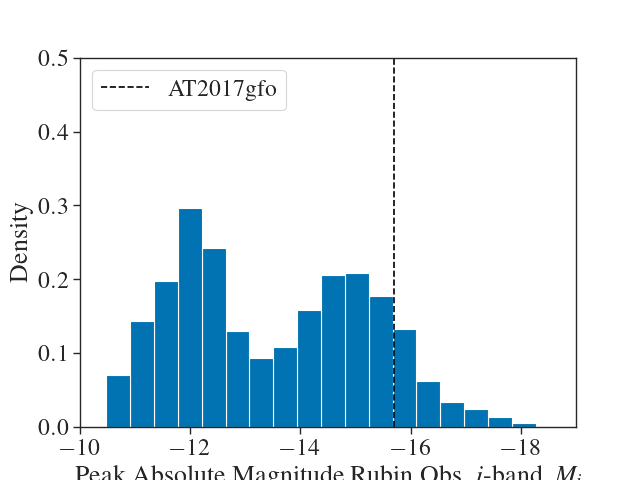

In [254]:
fig = plt.figure()
plt.hist(derived_test.peak_absmag_lssti, bins=20, density=True)
plt.xlim((-10, -19))
plt.ylim((0, 0.5))
plt.xlabel(r'Peak Absolute Magnitude Rubin Obs. $i$-band, $M_i$')
plt.axvline(-15.7, color='k', linestyle='--', label='AT2017gfo')
plt.legend()
plt.ylabel(r'Density')
fig.savefig('Prelim_peak_abs_mag.pdf', bbox_inches='tight')